# Nettoyage des données

## Import des librairies

In [1]:
# Import the `pandas` library as `pd`
import pandas as pd
# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
# Import the `numpy` library as `np`
import numpy as np
# Import de la librairie joblib
import os
from joblib import dump

## Création du contexte de mémoire

In [2]:
# cache directory for joblib objects
folder = './joblib_memmap'
try:
    os.mkdir(folder)
except FileExistsError:
    pass

## Chargement de la base

In [3]:
data = pd.read_csv("Base\movie_metadata.csv",sep=',')
print(data.head(5))

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0 

In [4]:
data.shape

(5043, 28)

In [5]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
# Affichage de TOUTES les colonnes
for col in range(len(data.columns)):
    print(col, ":\t", data.columns[col], "\t", data.dtypes[col])

0 :	 color 	 object
1 :	 director_name 	 object
2 :	 num_critic_for_reviews 	 float64
3 :	 duration 	 float64
4 :	 director_facebook_likes 	 float64
5 :	 actor_3_facebook_likes 	 float64
6 :	 actor_2_name 	 object
7 :	 actor_1_facebook_likes 	 float64
8 :	 gross 	 float64
9 :	 genres 	 object
10 :	 actor_1_name 	 object
11 :	 movie_title 	 object
12 :	 num_voted_users 	 int64
13 :	 cast_total_facebook_likes 	 int64
14 :	 actor_3_name 	 object
15 :	 facenumber_in_poster 	 float64
16 :	 plot_keywords 	 object
17 :	 movie_imdb_link 	 object
18 :	 num_user_for_reviews 	 float64
19 :	 language 	 object
20 :	 country 	 object
21 :	 content_rating 	 object
22 :	 budget 	 float64
23 :	 title_year 	 float64
24 :	 actor_2_facebook_likes 	 float64
25 :	 imdb_score 	 float64
26 :	 aspect_ratio 	 float64
27 :	 movie_facebook_likes 	 int64


## Création du champ ID

In [7]:
data['movie_id'] = data['movie_imdb_link'].apply(lambda x: str(int(x.partition("/tt")[2].partition("/?ref_=")[0])))

# Réarrangement des colonnes

In [8]:
data = data[['movie_id', 'movie_imdb_link', 'movie_title' , 'imdb_score', 'movie_facebook_likes', 'title_year', 'genres', 
             'plot_keywords', 'color', 'duration', 'country', 'aspect_ratio', 'language', 'budget', 'gross',
             'director_name', 'director_facebook_likes',
             'actor_1_name', 'actor_2_name', 'actor_3_name',
             'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes',       
             'content_rating', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 'facenumber_in_poster'
            ]]

In [9]:
data

,movie_id,movie_imdb_link,movie_title,imdb_score,movie_facebook_likes,title_year,genres,plot_keywords,color,duration,...,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,content_rating,num_critic_for_reviews,num_user_for_reviews,num_voted_users,facenumber_in_poster
0,499549,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,7.9,33000,2009.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,178.0,...,Wes Studi,1000.0,936.0,855.0,4834,PG-13,723.0,3054.0,886204,0.0
1,449088,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,7.1,0,2007.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,169.0,...,Jack Davenport,40000.0,5000.0,1000.0,48350,PG-13,302.0,1238.0,471220,0.0
2,2379713,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Spectre,6.8,85000,2015.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,148.0,...,Stephanie Sigman,11000.0,393.0,161.0,11700,PG-13,602.0,994.0,275868,1.0
3,1345836,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight Rises,8.5,164000,2012.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,164.0,...,Joseph Gordon-Levitt,27000.0,23000.0,23000.0,106759,PG-13,813.0,2701.0,1144337,0.0
4,5289954,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Star Wars: Episode VII - The Force Awakens ...,7.1,0,NaN,Documentary,NaN,NaN,NaN,...,NaN,131.0,12.0,NaN,143,NaN,NaN,NaN,8,0.0
5,401729,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,John Carter,6.6,24000,2012.0,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,Color,132.0,...,Polly Walker,640.0,632.0,530.0,1873,PG-13,462.0,738.0,212204,1.0
6,413300,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,Spider-Man 3,6.2,0,2007.0,Action|Adventure|Romance,sandman|spider man|symbiote|venom|villain,Color,156.0,...,Kirsten Dunst,24000.0,11000.0,4000.0,46055,PG-13,392.0,1902.0,383056,0.0
7,398286,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,Tangled,7.8,29000,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,17th century|based on fairy tale|disney|flower...,Color,100.0,...,M.C. Gainey,799.0,553.0,284.0,2036,PG,324.0,387.0,294810,1.0
8,2395427,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,Avengers: Age of Ultron,7.5,118000,2015.0,Action|Adventure|Sci-Fi,artificial intelligence|based on comic book|ca...,Color,141.0,...,Scarlett Johansson,26000.0,21000.0,19000.0,92000,PG-13,635.0,1117.0,462669,4.0
9,417741,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,Harry Potter and the Half-Blood Prince,7.5,10000,2009.0,Adventure|Family|Fantasy|Mystery,blood|book|love|potion|professor,Color,153.0,...,Rupert Grint,25000.0,11000.0,10000.0,58753,PG,375.0,973.0,321795,3.0


# Analyse univariée:


imdb_score :
minimum =  1.6
maximum =  9.5
moyenne =  6.442137616498111
médiane =  6.6
mode =  0    6.7
dtype: float64
variance =  1.2656346929395306
ecart-type =  1.1250043079648764
skewness =  -0.7414713363265145
kurtosis =  0.9356915064109081


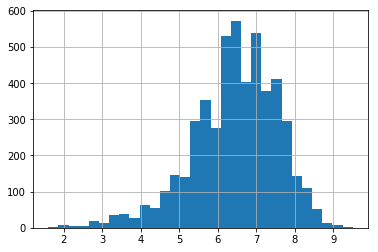

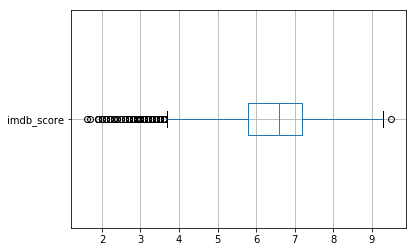

--------------------
title_year :
minimum =  1916.0
maximum =  2016.0
moyenne =  2002.4705167173252
médiane =  2005.0
mode =  0    2009.0
dtype: float64
variance =  155.58408514333655
ecart-type =  12.473334964769307
skewness =  -2.292273349852285
kurtosis =  7.439212616493873


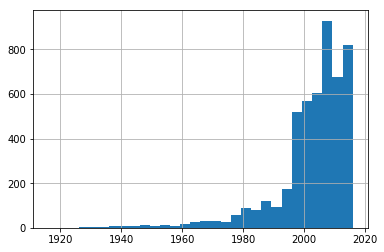

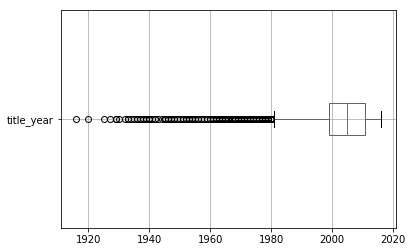

--------------------
duration :
minimum =  7.0
maximum =  511.0
moyenne =  107.2010739856802
médiane =  103.0
mode =  0    90.0
dtype: float64
variance =  634.7847482498878
ecart-type =  25.194934972130564
skewness =  2.339134041413252
kurtosis =  22.565797158810945


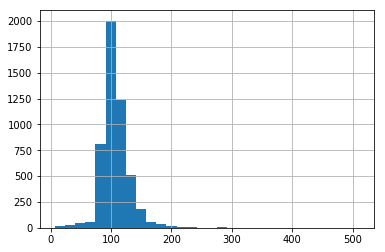

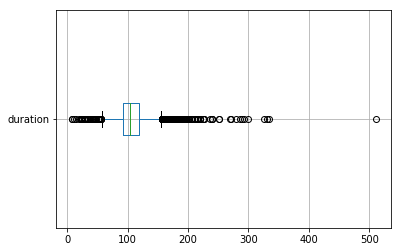

--------------------
aspect_ratio :
minimum =  1.18
maximum =  16.0
moyenne =  2.2204030547307805
médiane =  2.35
mode =  0    2.35
dtype: float64
variance =  1.91812974845053
ecart-type =  1.3849656127321466
skewness =  9.39005631205365
kurtosis =  90.65322055026077


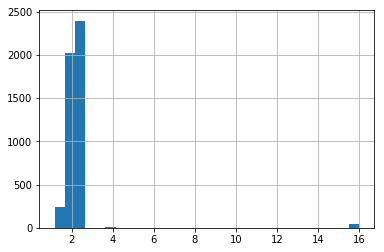

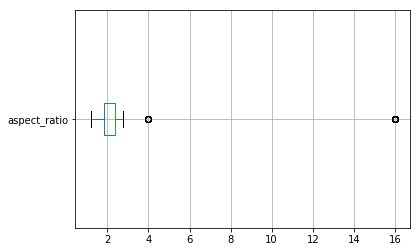

--------------------
budget :
minimum =  218.0
maximum =  12215500000.0
moyenne =  39752620.436387606
médiane =  20000000.0
mode =  0    20000000.0
dtype: float64
variance =  4.247401641384887e+16
ecart-type =  206092252.1926743
skewness =  48.157435389562856
kurtosis =  2724.257432744399


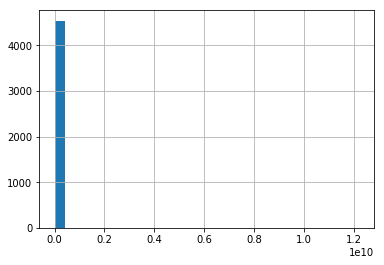

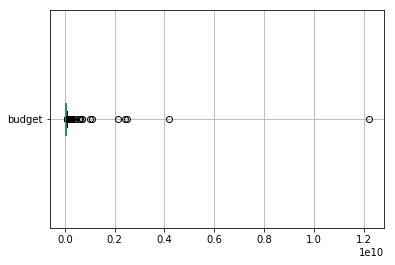

--------------------
gross :
minimum =  162.0
maximum =  760505847.0
moyenne =  48468407.52680933
médiane =  25517500.0
mode =  0      3000000.0
1      5773519.0
2      8000000.0
3     34964818.0
4     47000000.0
5    144512310.0
6    177343675.0
7    218051260.0
dtype: float64
variance =  4684685232083006.0
ecart-type =  68444760.44287835
skewness =  3.1272038380632154
kurtosis =  14.86886885317699


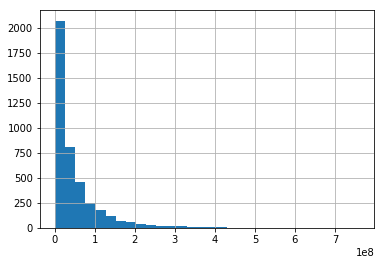

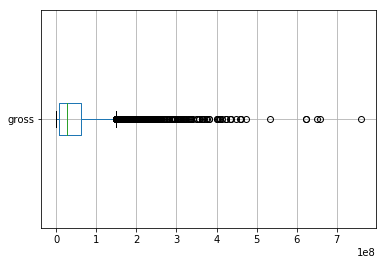

--------------------
director_facebook_likes :
minimum =  0.0
maximum =  23000.0
moyenne =  686.5092123911724
médiane =  49.0
mode =  0    0.0
dtype: float64
variance =  7913215.33596473
ecart-type =  2813.0437849355862
skewness =  5.229701169529903
kurtosis =  27.256289350709817


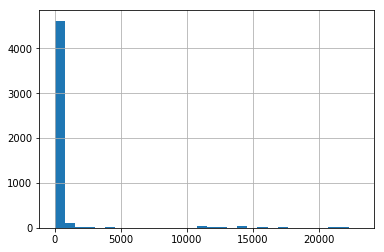

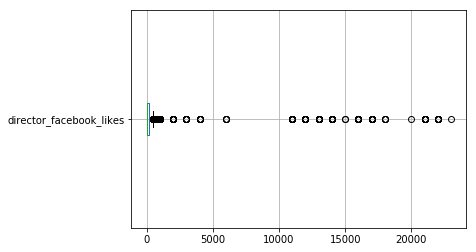

--------------------
actor_1_facebook_likes :
minimum =  0.0
maximum =  640000.0
moyenne =  6560.04706115965
médiane =  988.0
mode =  0    1000.0
dtype: float64
variance =  225578402.47454903
ecart-type =  15019.267707666344
skewness =  19.121776379050416
kurtosis =  683.5473558891498


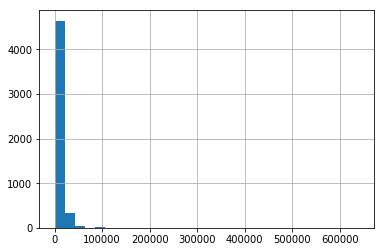

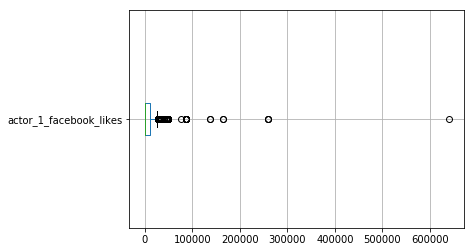

--------------------
actor_2_facebook_likes :
minimum =  0.0
maximum =  137000.0
moyenne =  1651.7544731610337
médiane =  595.0
mode =  0    1000.0
dtype: float64
variance =  16338063.188424248
ecart-type =  4042.0370097791347
skewness =  9.88473317949997
kurtosis =  256.7951889495523


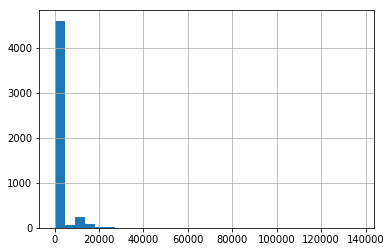

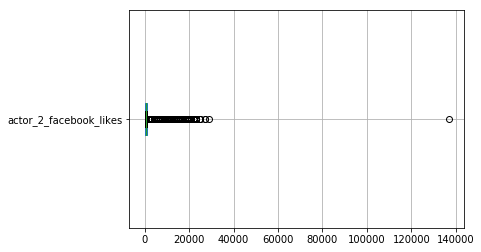

--------------------
actor_3_facebook_likes :
minimum =  0.0
maximum =  23000.0
moyenne =  645.0097609561753
médiane =  371.5
mode =  0    1000.0
dtype: float64
variance =  2771811.6937294207
ecart-type =  1664.8758793764239
skewness =  7.279020793499702
kurtosis =  60.56388810613453


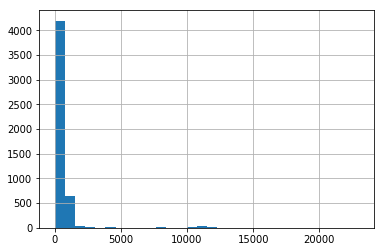

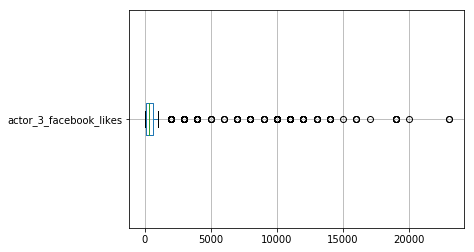

--------------------
num_critic_for_reviews :
minimum =  1.0
maximum =  813.0
moyenne =  140.1942719807731
médiane =  110.0
mode =  0    1.0
dtype: float64
variance =  14784.005919523022
ecart-type =  121.58949757081416
skewness =  1.5165326997660493
kurtosis =  2.9134164097694666


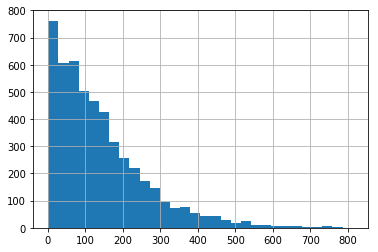

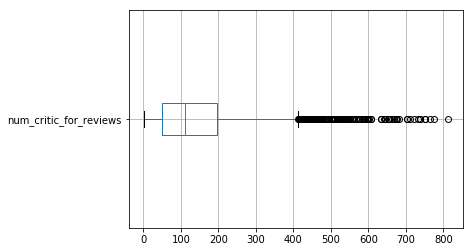

--------------------
num_user_for_reviews :
minimum =  1.0
maximum =  5060.0
moyenne =  272.77080844285143
médiane =  156.0
mode =  0    1.0
dtype: float64
variance =  142842.6127440294
ecart-type =  377.94525098753314
skewness =  4.121475158867528
kurtosis =  26.438297391971926


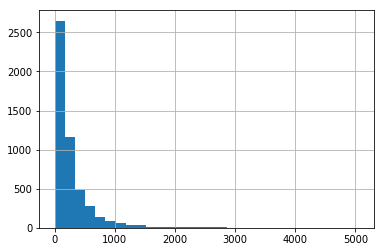

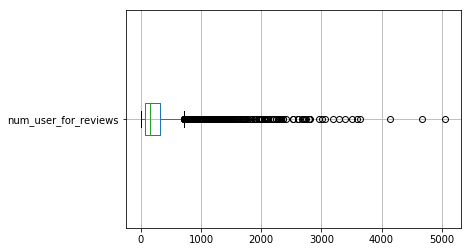

--------------------
facenumber_in_poster :
minimum =  0.0
maximum =  43.0
moyenne =  1.3711729622266402
médiane =  1.0
mode =  0    0.0
dtype: float64
variance =  4.053681924358252
ecart-type =  2.0133757533948433
skewness =  4.38476593896687
kurtosis =  52.03373532893253


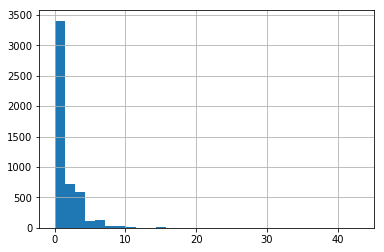

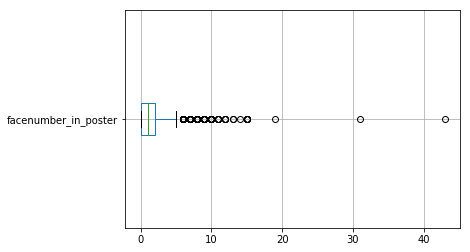

--------------------


In [10]:
#Tableau des indicateurs de tendance centrale
for col in range(len(data.columns)):
    if data.dtypes[col]== 'float64':
        print(data.columns[col], ":")
        print("minimum = ", data[data.columns[col]].min())
        print("maximum = ", data[data.columns[col]].max())        
        print("moyenne = ", data[data.columns[col]].mean())
        print("médiane = ", data[data.columns[col]].median())
        print("mode = ", data[data.columns[col]].mode())
        print("variance = ",data[data.columns[col]].var(ddof=0))
        print("ecart-type = ",data[data.columns[col]].std(ddof=0))
        print("skewness = ",data[data.columns[col]].skew())
        print("kurtosis = ",data[data.columns[col]].kurtosis())
        data[data.columns[col]].hist(bins = 30)
        plt.show()
        data.boxplot(column=data.columns[col], vert=False)
        plt.show()
        print("-"*20)

## Suppression des colonnes inutiles

In [11]:
col_inutiles = ['movie_imdb_link', 'movie_facebook_likes', 'title_year',
                'color', 'duration', 'country', 'aspect_ratio', 'language', 'gross', 
                'director_facebook_likes',
                'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes',
                'content_rating', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 'facenumber_in_poster'
               ]
data.drop(columns = col_inutiles, axis=1, inplace=True)

## Recherche de champs vides dans le titre

0 :	 movie_id 	 100.0
1 :	 movie_title 	 100.0
2 :	 imdb_score 	 100.0
3 :	 genres 	 100.0
4 :	 plot_keywords 	 96.96609161213563
5 :	 budget 	 90.2439024390244
6 :	 director_name 	 97.93773547491573
7 :	 actor_1_name 	 99.86119373388856
8 :	 actor_2_name 	 99.74221693436446
9 :	 actor_3_name 	 99.54392226849097


C:\Users\Administrateur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


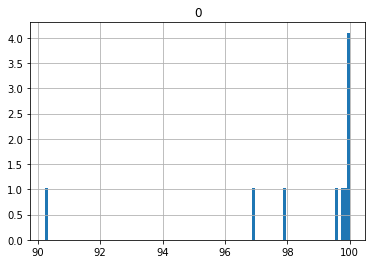

In [12]:
# Taux de remplissage des colonnes
taux_col = []
nb_prod = len(data)
taux = 0
for col in range(len(data.columns)):
    taux = data[data.columns[col]].count()/nb_prod*100
    taux_col.append(taux)
    print(col, ":\t", data.columns[col], "\t", taux)
# Tracé des taux de remplissage
df = pd.DataFrame(data=taux_col)
df.hist(normed=True, bins = 100)
plt.show()

In [13]:
data_titlelen = data.drop(data.loc[data['movie_title'].apply(len) > 2].index, inplace = False)


In [14]:
data_titlelen.describe()

,imdb_score,budget
count,5.000000,4.000000e+00
mean,6.380000,1.037500e+07
std,0.584808,1.318696e+07
min,5.600000,1.500000e+06
25%,6.200000,4.125000e+06
50%,6.200000,5.000000e+06
75%,6.800000,1.125000e+07
max,7.100000,3.000000e+07


In [15]:
print(data_titlelen)

     movie_id movie_title  imdb_score  \
1667   472033          9          7.1   
3064   184791          O          6.2   
3729   184791          O          6.2   
4504  1879030          Q          5.6   
4902  1517177          3          6.8   

                                                 genres  \
1667  Action|Adventure|Animation|Drama|Mystery|Sci-F...   
3064                             Drama|Romance|Thriller   
3729                             Drama|Romance|Thriller   
4504                                              Drama   
4902                               Comedy|Drama|Romance   

                                          plot_keywords      budget  \
1667                   hope|key|machine|number|rag doll  30000000.0   
3064  basketball|basketball player|boarding school|l...   5000000.0   
3729  basketball|basketball player|boarding school|l...   5000000.0   
4504  female explicit nudity|hand job|oral sex|penet...   1500000.0   
4902  female nudity|full frontal female nud

In [16]:
data.shape

(5043, 10)

## Suppression des espaces et \xa0 en fin de champs

In [17]:
data['movie_title'] = data['movie_title'].apply(lambda x: x.strip())

In [18]:
data

,movie_id,movie_title,imdb_score,genres,plot_keywords,budget,director_name,actor_1_name,actor_2_name,actor_3_name
0,499549,Avatar,7.9,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,449088,Pirates of the Caribbean: At World's End,7.1,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,2379713,Spectre,6.8,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,1345836,The Dark Knight Rises,8.5,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,5289954,Star Wars: Episode VII - The Force Awakens,7.1,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN
5,401729,John Carter,6.6,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,263700000.0,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker
6,413300,Spider-Man 3,6.2,Action|Adventure|Romance,sandman|spider man|symbiote|venom|villain,258000000.0,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst
7,398286,Tangled,7.8,Adventure|Animation|Comedy|Family|Fantasy|Musi...,17th century|based on fairy tale|disney|flower...,260000000.0,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey
8,2395427,Avengers: Age of Ultron,7.5,Action|Adventure|Sci-Fi,artificial intelligence|based on comic book|ca...,250000000.0,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
9,417741,Harry Potter and the Half-Blood Prince,7.5,Adventure|Family|Fantasy|Mystery,blood|book|love|potion|professor,250000000.0,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint


## Suppression des doublons

In [19]:
data_dupl = data.duplicated(keep=False)
print("Nombre de lignes dupliquées: ", data_dupl.shape[0])

data.drop_duplicates(keep='first', inplace=True)

print("Nombre de lignes après suppression des doublons: ", data.shape[0])

Nombre de lignes dupliquées:  5043
Nombre de lignes après suppression des doublons:  4922


## Recherche de doublons sur le titre du film

In [20]:
dupl_imdb = data.duplicated(subset='movie_id', keep=False)
print("Nombre de films avec doublons: ", dupl_imdb.shape[0])



Nombre de films avec doublons:  4922


In [21]:
## On sort les doublons sur le lien imdb

dupl_imdb = data.duplicated(subset='movie_id', keep=False)

## On supprime les doublons sur le lien imdb

#data.drop_duplicates(subset='movie_imdb_link', keep='first', inplace=True)


In [22]:
data_dupl_imdb = data[dupl_imdb == True].sort_values(by=['movie_id'])

In [23]:
data_dupl_imdb

,movie_id,movie_title,imdb_score,genres,plot_keywords,budget,director_name,actor_1_name,actor_2_name,actor_3_name
367,2638144,Ben-Hur,6.1,Adventure|Drama|History,NaN,NaN,Timur Bekmambetov,Morgan Freeman,Ayelet Zurer,Moises Arias
2613,2638144,Ben-Hur,6.1,Adventure|Drama|History,chariot race|epic|false accusation|jerusalem|s...,100000000.0,Timur Bekmambetov,Morgan Freeman,Ayelet Zurer,Moises Arias
3967,2638144,Ben-Hur,6.0,Adventure|Drama|History,chariot race|epic|false accusation|jerusalem|s...,100000000.0,Timur Bekmambetov,Morgan Freeman,Ayelet Zurer,Moises Arias
1852,765010,Brothers,7.1,Drama|Thriller,afghanistan|death of soldier|presumed dead|pri...,26000000.0,Jim Sheridan,Natalie Portman,Jake Gyllenhaal,Bailee Madison
2882,765010,Brothers,7.1,Drama|Thriller,afghanistan|death of soldier|presumed dead|pri...,26000000.0,Jim Sheridan,Natalie Portman,Jake Gyllenhaal,Ethan Suplee


Les lignes pour lesquelles le lien imdb (donc le film) est identique, mais pas toute la ligne correspondent à des mises à jour du même film (le nombre de like a augmenté, etc...) --> garder celui qui a le plus de like.

edit -- nb de likes supprimé, donc fonction mise en commentaire

In [24]:
data = data.reindex(index = range(4922))

In [25]:
data

,movie_id,movie_title,imdb_score,genres,plot_keywords,budget,director_name,actor_1_name,actor_2_name,actor_3_name
0,499549,Avatar,7.9,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000.0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,449088,Pirates of the Caribbean: At World's End,7.1,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000.0,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,2379713,Spectre,6.8,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000.0,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,1345836,The Dark Knight Rises,8.5,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000.0,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,5289954,Star Wars: Episode VII - The Force Awakens,7.1,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN
5,401729,John Carter,6.6,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,263700000.0,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker
6,413300,Spider-Man 3,6.2,Action|Adventure|Romance,sandman|spider man|symbiote|venom|villain,258000000.0,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst
7,398286,Tangled,7.8,Adventure|Animation|Comedy|Family|Fantasy|Musi...,17th century|based on fairy tale|disney|flower...,260000000.0,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey
8,2395427,Avengers: Age of Ultron,7.5,Action|Adventure|Sci-Fi,artificial intelligence|based on comic book|ca...,250000000.0,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
9,417741,Harry Potter and the Half-Blood Prince,7.5,Adventure|Family|Fantasy|Mystery,blood|book|love|potion|professor,250000000.0,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint


# Exploration des données

imdb_score :
minimum =  1.6
maximum =  9.5
moyenne =  6.43976705490848
médiane =  6.6
mode =  0    6.7
dtype: float64
variance =  1.2636515264354138
ecart-type =  1.124122558458558
skewness =  -0.7362340231315287
kurtosis =  0.9489124020443285


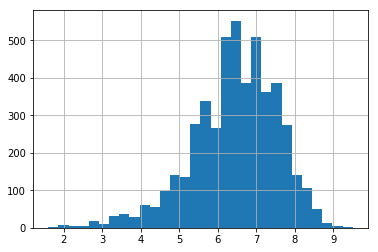

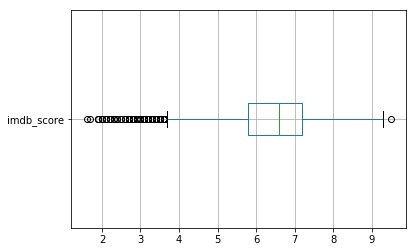

--------------------
budget :
minimum =  218.0
maximum =  12215500000.0
moyenne =  40130006.32167511
médiane =  20000000.0
mode =  0    20000000.0
dtype: float64
variance =  4.433627432782685e+16
ecart-type =  210561806.43180957
skewness =  47.27941152697443
kurtosis =  2617.822492707312


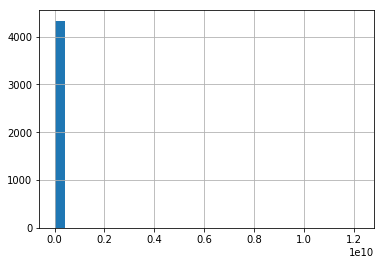

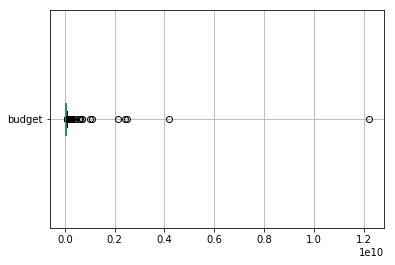

--------------------


In [26]:
#Tableau des indicateurs de tendance centrale
for col in range(len(data.columns)):
    if data.dtypes[col]== 'float64':
        print(data.columns[col], ":")
        print("minimum = ", data[data.columns[col]].min())
        print("maximum = ", data[data.columns[col]].max())        
        print("moyenne = ", data[data.columns[col]].mean())
        print("médiane = ", data[data.columns[col]].median())
        print("mode = ", data[data.columns[col]].mode())
        print("variance = ",data[data.columns[col]].var(ddof=0))
        print("ecart-type = ",data[data.columns[col]].std(ddof=0))
        print("skewness = ",data[data.columns[col]].skew())
        print("kurtosis = ",data[data.columns[col]].kurtosis())
        data[data.columns[col]].hist(bins = 30)
        plt.show()
        data.boxplot(column=data.columns[col], vert=False)
        plt.show()
        print("-"*20)

## Nettoyer les outliers (regarder les valeurs aberrantes)


In [27]:
q = data['budget'].quantile(0.99)

In [28]:
data_budget = data[data['budget'] > q]

In [29]:
print(data_budget)

     movie_id                                  movie_title  imdb_score  \
0      499549                                       Avatar         7.9   
1      449088     Pirates of the Caribbean: At World's End         7.1   
2     2379713                                      Spectre         6.8   
3     1345836                        The Dark Knight Rises         8.5   
5      401729                                  John Carter         6.6   
6      413300                                 Spider-Man 3         6.2   
7      398286                                      Tangled         7.8   
8     2395427                      Avengers: Age of Ultron         7.5   
9      417741       Harry Potter and the Half-Blood Prince         7.5   
10    2975590           Batman v Superman: Dawn of Justice         6.9   
11     348150                             Superman Returns         6.1   
13     383574   Pirates of the Caribbean: Dead Man's Chest         7.3   
14    1210819                         

Les budgets sont indiqués en monnaie du pays de production. L'exploitation de cette information est donc incohérente en l'état. Or on n'a pas l'information de la monnaie utilisée, on ne peut donc pas envisager de corriger le champs. 

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [30]:
# Suppression du champ Budget
data.drop(columns = 'budget', axis=1, inplace=True)

## Suppression des lignes comportant des valeurs manquantes

In [31]:
data.shape

(4922, 9)

In [32]:
data = data.dropna()

In [33]:
data.shape

(4573, 9)

In [34]:
#data = data.reindex(index = range(4039))
data = data.reset_index(drop=True)

In [35]:
data

,movie_id,movie_title,imdb_score,genres,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
0,499549,Avatar,7.9,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,449088,Pirates of the Caribbean: At World's End,7.1,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,2379713,Spectre,6.8,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,1345836,The Dark Knight Rises,8.5,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,401729,John Carter,6.6,Action|Adventure|Sci-Fi,alien|american civil war|male nipple|mars|prin...,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker
5,413300,Spider-Man 3,6.2,Action|Adventure|Romance,sandman|spider man|symbiote|venom|villain,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst
6,398286,Tangled,7.8,Adventure|Animation|Comedy|Family|Fantasy|Musi...,17th century|based on fairy tale|disney|flower...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey
7,2395427,Avengers: Age of Ultron,7.5,Action|Adventure|Sci-Fi,artificial intelligence|based on comic book|ca...,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
8,417741,Harry Potter and the Half-Blood Prince,7.5,Adventure|Family|Fantasy|Mystery,blood|book|love|potion|professor,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint
9,2975590,Batman v Superman: Dawn of Justice,6.9,Action|Adventure|Sci-Fi,based on comic book|batman|sequel to a reboot|...,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin


# Augmentation de dimensions
## Catégories de films

In [36]:
data_genres = data.genres.str.get_dummies()

In [37]:
data_genres.shape

(4573, 24)

In [38]:
data_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,1,1,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Mots clés

In [39]:
data_plt = data.rename(columns={'plot_keywords': 'plotkeys'}, inplace=False)
#data_plt = data_plt[:3000]

In [40]:
data_keys = data_plt.plotkeys.str.get_dummies()
data_keys.shape

(4573, 7869)

### Réalisateur

In [41]:
data_dir = data.director_name.str.get_dummies()
data_dir.shape

(4573, 2211)

In [42]:
dir_count = data_dir.sum(axis=0)

In [43]:
dir_count

A. Raven Cruz                  1
Aaron Hann                     1
Aaron Schneider                1
Aaron Seltzer                  1
Abel Ferrara                   1
Adam Brooks                    1
Adam Carolla                   1
Adam Goldberg                  1
Adam Green                     1
Adam Jay Epstein               1
Adam Marcus                    1
Adam McKay                     6
Adam Rapp                      1
Adam Rifkin                    2
Adam Shankman                  8
Adrian Lyne                    4
Adrienne Shelly                1
Agnieszka Holland              1
Agnieszka Wojtowicz-Vosloo     1
Agustín Díaz Yanes             1
Aki Kaurismäki                 1
Akira Kurosawa                 2
Akiva Goldsman                 1
Akiva Schaffer                 2
Al Franklin                    1
Al Silliman Jr.                1
Alain Resnais                  1
Alan Alda                      1
Alan Cohn                      1
Alan J. Pakula                 2
          

C:\Users\Administrateur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


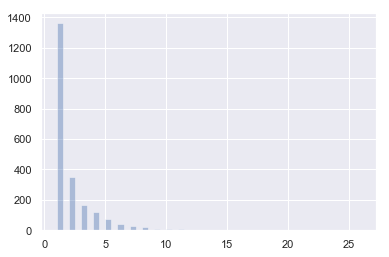

In [44]:
import seaborn as sns, numpy as np
sns.set()
ax = sns.distplot(data_dir.sum(axis=0), kde = False)

On supprime les colonnes "Directeur" lorsqu'ils ont fait un nombre de films inférieur à un seuil

In [45]:
seuil_films = 2
data_dir.drop([col for col, val in data_dir.sum().iteritems() if val < seuil_films], axis=1, inplace=True)

dir_count = data_dir.sum(axis=0)

In [46]:
dir_count

Adam McKay                6
Adam Rifkin               2
Adam Shankman             8
Adrian Lyne               4
Akira Kurosawa            2
Akiva Schaffer            2
Alan J. Pakula            2
Alan Parker               3
Alan Taylor               2
Albert Hughes             3
Alejandro Amenábar        4
Alejandro G. Iñárritu     6
Alex Kendrick             2
Alex Proyas               5
Alexander Payne           5
Alexandre Aja             4
Alfonso Cuarón            4
Alfred Hitchcock          8
Allison Anders            2
Amy Heckerling            4
Anand Tucker              3
Andrew Adamson            5
Andrew Bergman            2
Andrew Davis              4
Andrew Dominik            2
Andrew Erwin              2
Andrew Fleming            4
Andrew Niccol             5
Andrew Stanton            3
Andrey Konchalovskiy      2
                         ..
Victor Fleming            3
Victor Nunez              2
Victor Salva              3
Vincent Gallo             2
Vincenzo Natali     

C:\Users\Administrateur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


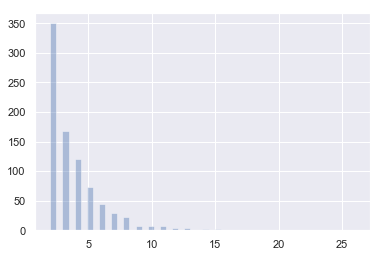

In [47]:
sns.set()
ax = sns.distplot(data_dir.sum(axis=0), kde = False)

In [48]:
data_dir.shape

(4573, 849)

### Acteurs

In [49]:
data_act = data[['actor_1_name', 'actor_2_name', 'actor_3_name']]#[:4000]
data_act = data_act.fillna(0)

In [50]:
data_act.isna().sum()

actor_1_name    0
actor_2_name    0
actor_3_name    0
dtype: int64

In [51]:
data_actor = data_act.stack().str.get_dummies().sum(level=0)
data_actor.shape

(4573, 5652)

In [52]:
seuil_films = 3
data_actor.drop([col for col, val in data_actor.sum().iteritems() if val < seuil_films], axis=1, inplace=True)

In [53]:
act_count = data_actor.sum(axis=0)

In [54]:
act_count

50 Cent                     5
A.J. Buckley                5
Aaron Yoo                   5
Aasif Mandvi                4
Abbie Cornish               7
Abhishek Bachchan           3
Abigail Spencer             4
Abraham Benrubi             3
Adam Arkin                  3
Adam Baldwin                6
Adam Brown                  3
Adam Garcia                 4
Adam Goldberg              10
Adam Sandler               24
Adam Scott                 14
Adrian Martinez             5
Adrienne Barbeau            3
Agnes Bruckner              4
Aidan Quinn                10
Aidan Turner                4
Aimee Garcia                4
Aisha Tyler                 3
Al Pacino                  21
Alan Oppenheimer            3
Alan Rickman               10
Alan Ruck                   7
Alanna Ubach                4
Albert Brooks              11
Albert Finney               7
Alden Ehrenreich            4
                           ..
Wendell Pierce              4
Wendi McLendon-Covey        3
Wendie Mal

In [55]:
data_actor.shape

(4573, 1288)

## Data set augmenté

In [56]:
# On supprime les colonnes genres et director_name car elles sont remplacées par lecolonnes binaires générées par One Hot Encoder
columns = ['genres', 'director_name','plot_keywords', 'actor_1_name', 'actor_2_name', 'actor_3_name']
data.drop(columns, inplace=True, axis=1)

In [57]:
data_augm_feat = pd.concat([data_genres, data_dir, data_keys, data_actor], axis = 1, join = 'inner')

In [58]:
data_augm_feat.shape

(4573, 10030)

# Réduction dim: PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components = 10030)
#pca = PCA()
data_augm_red = pca.fit_transform(data_augm_feat)
data_augm_red.shape

(4573, 4573)

In [61]:
print(sum(pca.explained_variance_ratio_))

0.9999999999999982


In [62]:
print(pca.explained_variance_ratio_)

[4.17585206e-02 3.93937370e-02 2.25759180e-02 ... 1.84383598e-06
 8.23549813e-33 2.46086451e-33]


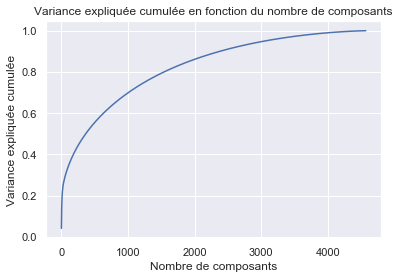

In [63]:
#evaluate the cumulative
cumulative = np.cumsum(pca.explained_variance_ratio_)
# plot the cumulative function
plt.plot(cumulative)
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée en fonction du nombre de composants')
plt.show()

In [64]:
pca = PCA(n_components = 2000)
data_augm_red = pca.fit_transform(data_augm_feat)
data_augm_red.shape
print(sum(pca.explained_variance_ratio_))

0.8576276298883401


In [65]:
df_augm = pd.DataFrame(data=data_augm_red)
df_augm.shape

(4573, 2000)

In [66]:
df_augm

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.566365,1.170727,0.939630,0.219425,0.278605,-0.166972,-0.065744,0.142076,0.647110,0.341051,...,0.010544,0.001409,-0.006806,0.038730,-0.024904,0.029350,-0.004551,-0.003722,0.029161,0.015994
1,0.402406,0.976815,0.807884,0.234689,0.008001,0.085883,-0.681050,0.367569,-0.020524,0.452350,...,-0.071952,-0.027600,0.006664,-0.030629,0.004971,0.050516,-0.033980,0.020988,0.034921,-0.025756
2,1.028051,0.715146,0.289091,0.420486,0.190123,0.026484,-0.032434,0.006727,-0.772538,-0.065067,...,0.032925,-0.004155,0.034423,0.012740,-0.001427,0.028120,-0.012912,0.013903,0.013785,0.036538
3,0.940058,0.323918,-0.173305,0.159867,0.297897,-0.200990,-0.176685,0.231317,-0.367469,-0.428864,...,-0.008163,0.058496,-0.023825,0.006143,0.027462,-0.060894,-0.044928,0.013119,0.003899,-0.026595
4,0.586371,0.988412,0.773450,0.328530,0.369447,-0.549971,0.254031,-0.448033,0.312303,0.206669,...,-0.040159,-0.016351,0.019446,0.067914,0.065141,0.006508,-0.053483,-0.034379,0.023995,-0.018328
5,0.114401,0.586099,0.593887,0.651838,0.844482,0.118052,-0.522422,-0.323606,-0.316559,0.278477,...,-0.019655,-0.006515,0.002602,-0.023771,-0.061170,-0.036437,0.000892,0.110837,0.004364,-0.069683
6,-1.043171,1.175665,0.476899,0.193644,-0.090065,1.327119,-0.135771,-0.040562,0.046947,-0.305045,...,0.048204,0.004894,0.010313,-0.007469,0.000546,0.007207,0.007628,-0.043049,0.025704,-0.001612
7,0.591054,0.966733,0.756314,0.359391,0.368689,-0.569446,0.205442,-0.416936,0.279841,0.280564,...,0.045391,-0.041223,-0.024463,0.019711,0.008768,-0.012595,-0.041354,-0.008404,0.024833,-0.046360
8,0.003320,0.833366,0.762073,-0.540475,-0.363838,1.067032,-0.266631,-0.233838,0.123864,0.486270,...,0.007418,-0.008644,0.000699,0.014189,0.018602,0.000587,0.043311,-0.012993,0.014147,0.033258
9,0.585149,0.964860,0.748006,0.352889,0.363947,-0.559831,0.179223,-0.395148,0.270008,0.248517,...,-0.023275,-0.044493,0.029670,0.011569,-0.018121,-0.019911,0.037665,0.025175,0.012668,0.068703


Le dataset ne permet pas de distinguer la relation utilisateur / appréciation de film.
on doit donc s'orienter vers une recommendation de type "content based".

# K-NN

In [67]:
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

## Evaluation des paramètres
### Algorithmes

In [68]:
# Liste des algorithmes à tester
list_algos = ['auto', 'ball_tree', 'kd_tree', 'brute']
#Liste de test
movie_list = ["Schindler's List",
              "Seven Samurai",
              "One Flew Over the Cuckoo's Nest",
              "Forrest Gump",
              "The Good, the Bad and the Ugly",
              "Pulp Fiction",
              "The Lion King",
              "Titanic"
             ]

In [69]:
# Noms de colonnes pour les dataframe utilisés
noms_col = np.array(['Film', 'R1', 'R2', 'R3', 'R4', 'R5', 'algo'])

# initialisation du dataframe de résultats
df_res = pd.DataFrame(columns = noms_col)

# Boucle sur les algorithmes
for algo in list_algos:
    neigh = NearestNeighbors(6, 0.4, algorithm=algo)
    neigh.fit(df_augm)
    
    # Boucle sur les films
    for movie in movie_list:
        # On récupère l'index du titre
        index = np.where(data["movie_title"] == movie)[0]
        row = data.iloc[index,:]
        
        # On crée un tableau qui va recevoir les résultats
        tab_res = row["movie_title"]
        
        # On cherche les 5 plus proches voisins
        resultat = neigh.kneighbors(df_augm.iloc[index,:].values.reshape(1,-1), 6, return_distance=False)
        
        # on test sur l'index des résultats pour supprimer le film lui-même
        for mov_neigh in range(len(resultat[0])):
            if resultat[0][mov_neigh] != index:
                # on crée un tableaud es titres de films proposés (voisins)
                tab_res = np.column_stack((tab_res, data.movie_title[resultat[0][mov_neigh]]))
        # on ajoute l'algo utilisé en fin de ligne
        tab_res = np.column_stack((tab_res, algo))
        # on convertit le tableau en dataframe pour ajouter au df de résultats
        df_restemp = pd.DataFrame(data=tab_res, columns = noms_col) 
        # on ajoute la ligne au dataframe de résultats
        df_res = df_res.append(df_restemp, ignore_index=True)
# On trie la liste de résultats par Film et algo pour faciliter la comparaison
df_res = df_res.sort_values(by=['Film','algo'])

In [70]:
df_res

,Film,R1,R2,R3,R4,R5,algo
3,Forrest Gump,Instructions Not Included,Lage Raho Munna Bhai,Elza,The Jimmy Show,Out of the Blue,auto
11,Forrest Gump,Instructions Not Included,Lage Raho Munna Bhai,Elza,The Jimmy Show,Out of the Blue,ball_tree
27,Forrest Gump,Instructions Not Included,Lage Raho Munna Bhai,Elza,The Jimmy Show,Out of the Blue,brute
19,Forrest Gump,Instructions Not Included,Lage Raho Munna Bhai,Elza,The Jimmy Show,Out of the Blue,kd_tree
2,One Flew Over the Cuckoo's Nest,Elza,Out of the Blue,Faith Like Potatoes,The Young Messiah,Ask Me Anything,auto
10,One Flew Over the Cuckoo's Nest,Elza,Out of the Blue,Faith Like Potatoes,The Young Messiah,Ask Me Anything,ball_tree
26,One Flew Over the Cuckoo's Nest,Elza,Out of the Blue,Faith Like Potatoes,The Young Messiah,Ask Me Anything,brute
18,One Flew Over the Cuckoo's Nest,Elza,Out of the Blue,Faith Like Potatoes,The Young Messiah,Ask Me Anything,kd_tree
5,Pulp Fiction,Out of the Blue,Elza,The Young Messiah,Faith Like Potatoes,Lilya 4-Ever,auto
13,Pulp Fiction,Out of the Blue,Elza,The Young Messiah,Faith Like Potatoes,Lilya 4-Ever,ball_tree


### Métrique
parametre "metric": essayer de comparer quelques types differents

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [71]:
# Liste des métriques à tester (comaptibles avec type de données)
list_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [72]:
# Noms de colonnes pour les dataframe utilisés
noms_col = np.array(['Film', 'R1', 'R2', 'R3', 'R4', 'R5', 'métrique'])

# initialisation du dataframe de résultats
df_res = pd.DataFrame(columns = noms_col)

# Boucle sur les algorithmes
for metric_method in list_metrics:
    neigh = NearestNeighbors(6, 0.4, algorithm='auto', metric=metric_method)
    neigh.fit(df_augm)
    
    # Boucle sur les films
    for movie in movie_list:
        # On récupère l'index du titre
        index = np.where(data["movie_title"] == movie)[0]
        row = data.iloc[index,:]
        
        # On crée un tableau qui va recevoir les résultats
        tab_res = row["movie_title"]
        
        # On cherche les 5 plus proches voisins
        resultat = neigh.kneighbors(df_augm.iloc[index,:].values.reshape(1,-1), 6, return_distance=False)
        
        # on test sur l'index des résultats pour supprimer le film lui-même
        for mov_neigh in range(len(resultat[0])):
            if resultat[0][mov_neigh] != index:
                # on crée un tableaud es titres de films proposés (voisins)
                tab_res = np.column_stack((tab_res, data.movie_title[resultat[0][mov_neigh]]))
        # on ajoute le métrique utilisé en fin de ligne
        tab_res = np.column_stack((tab_res, metric_method))
        # on convertit le tableau en dataframe pour ajouter au df de résultats
        df_restemp = pd.DataFrame(data=tab_res, columns = noms_col) 
        # on ajoute la ligne au dataframe de résultats
        df_res = df_res.append(df_restemp, ignore_index=True)
# On trie la liste de résultats par Film et algo pour faciliter la comparaison
df_res = df_res.sort_values(by=['Film','métrique'])

In [73]:
df_res

,Film,R1,R2,R3,R4,R5,métrique
19,Forrest Gump,I Can Do Bad All by Myself,The Guilt Trip,Love and Death on Long Island,All or Nothing,Jesus' Son,chebyshev
3,Forrest Gump,Instructions Not Included,Lage Raho Munna Bhai,Elza,The Jimmy Show,Out of the Blue,euclidean
11,Forrest Gump,Cast Away,Instructions Not Included,Out of the Blue,Sholem Aleichem: Laughing in the Darkness,Ramanujan,manhattan
27,Forrest Gump,Instructions Not Included,Lage Raho Munna Bhai,Elza,The Jimmy Show,Out of the Blue,minkowski
18,One Flew Over the Cuckoo's Nest,An Education,The Nun's Story,Higher Ground,The Ice Storm,Do the Right Thing,chebyshev
2,One Flew Over the Cuckoo's Nest,Elza,Out of the Blue,Faith Like Potatoes,The Young Messiah,Ask Me Anything,euclidean
10,One Flew Over the Cuckoo's Nest,Invaders from Mars,Out of the Blue,Ramanujan,Dwegons and Leprechauns,Sholem Aleichem: Laughing in the Darkness,manhattan
26,One Flew Over the Cuckoo's Nest,Elza,Out of the Blue,Faith Like Potatoes,The Young Messiah,Ask Me Anything,minkowski
21,Pulp Fiction,Lilya 4-Ever,Out of the Blue,Spring Breakers,Lady Vengeance,Black Water Transit,chebyshev
5,Pulp Fiction,Out of the Blue,Elza,The Young Messiah,Faith Like Potatoes,Lilya 4-Ever,euclidean


## Modélisation avec paramètres sélectionnés

In [74]:
neigh = NearestNeighbors(6, 0.4, algorithm = 'auto', metric = 'chebyshev')
neigh.fit(df_augm)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='chebyshev',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=0.4)

In [75]:
tab_resultat= np.empty(shape=[0, 6])

for index, row in data.iterrows():
    # On crée un tableau qui va recevoir les résultats
    tab_res = [row["movie_title"]]
    # On récupère l'index du titre
    #index_movie = data_augm["movie_title"][1]
    # On cherche les 5 plus proches voisins
    resultat = neigh.kneighbors(df_augm.iloc[index, :].values.reshape(1,-1), 6, return_distance=False)
    # on affiche le résultat
    for mov_neigh in range(len(resultat[0])):
        if resultat[0][mov_neigh] != index:
#            tab_res = np.concatenate((tab_res, data_augm.loc[resultat[0][mov_neigh], 'movie_title']), axis=None)
#            tab_res = np.concatenate((tab_res, data.movie_title[resultat[0][mov_neigh]]), axis=1)
            tab_res = np.column_stack((tab_res, data.movie_id[resultat[0][mov_neigh]]))
#    tab_resultat = np.column_stack((tab_resultat, tab_res))
    tab_resultat = np.concatenate((tab_resultat, tab_res), axis=0)

In [76]:
tab_resultat = np.append(data, tab_resultat,axis=1)
df_result = pd.DataFrame(data=tab_resultat, columns = ['movie_id','movie_title', 'score','Film', 'R1', 'R2', 'R3', 'R4', 'R5'])
df_result.drop(columns = ['movie_title', 'score'], axis=1, inplace=True)

In [77]:
df_result

,movie_id,Film,R1,R2,R3,R4,R5
0,499549,Avatar,101412,121766,2983582,121765,80684
1,449088,Pirates of the Caribbean: At World's End,325980,383574,91203,803096,938283
2,2379713,Spectre,82398,116253,381061,457495,283160
3,1345836,The Dark Knight Rises,1366365,99810,2402157,814022,443632
4,401729,John Carter,1631867,185183,116629,1628841,90605
5,413300,Spider-Man 3,183790,3152288,145487,1321869,81573
6,398286,Tangled,103639,780521,350194,118829,337711
7,2395427,Avengers: Age of Ultron,3498820,2975590,1843866,371746,848228
8,417741,Harry Potter and the Half-Blood Prince,963966,983193,2452042,75005,1272051
9,2975590,Batman v Superman: Dawn of Justice,87182,1133985,348150,131646,3498820


# Sauvegarde du dataframe de résultats avec joblib

In [78]:
data_filename_memmap = os.path.join(folder, 'data_memmap')
dump(df_result, data_filename_memmap)

['./joblib_memmap\\data_memmap']